# Tutorial Introducción al análisis de patrones
## Luis Fernando Torres


En el presente informe se muestra y se explica como es la metodología de cada una de las etapas que componen el análisis de patrones.

<img src="metodologia.png">

Se familiariza con cada una de las etapas, por medio de un ejercicio práctico enfocado en el procesamiento digital de señales de voz. Se implementa la primera etapa que consiste en la adquisición de los datos, luego se realiza el acondicionamiento del audio en la etapa de preprocesado para ser analizados adecuadamente, posteriormente se hace la extracción de características donde se obtienen representaciones de los datos adquiridos.

In [1]:
pip install sklearn 

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Librerias a usar 
import numpy as np
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal
import matplotlib.pyplot as plt
import sklearn 
from sklearn.decomposition import PCA #Libreria para aplicar PCA
from sklearn.preprocessing import StandardScaler # Libreria para normalizar datos
from sklearn.model_selection import train_test_split #Dividir los datos 

In [3]:
def graficar(x,y,x_label,y_label,titulo,tamanio=(10,4)):
    """
    Función para graficar datos
    inputs:
        x: Array de puntos del eje x
        y: Array de puntos del eje y
        x_label: label del eje x
        y_label: label para el eje y
        titulo: titulo de la grafica
        
    """
    plt.figure(figsize=tamanio)
    plt.plot(x,y)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    plt.title(titulo,fontsize=16)
    plt.show()

## Pre-procesamiento

Para trabajar con señales de vos, es necesario adecuar la señal para obtener una información mejor representada. Para esto se debe eliminar el nivel DC que puede traer la señal desde el momento de adquisición de los datos, y esto se hace restando el promedio de la señal en cada punto o instante de tiempo de ella. Por otra parte, para visualizar mejor los datos es importante normalizar las amplitudes, es decir, hacer que estos valores estén entre -1 y 1, para esto se divide cada valor de la señal sin nivel DC por el valor máximo de amplitud en valor absoluto. De esta manera se obtiene una señal centrada y con valores más fáciles de tratar.

In [4]:
file_audio=('audio.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
t=np.arange(0, float(len(x)), 1.0) # Vector de tiempo sin normalizar 

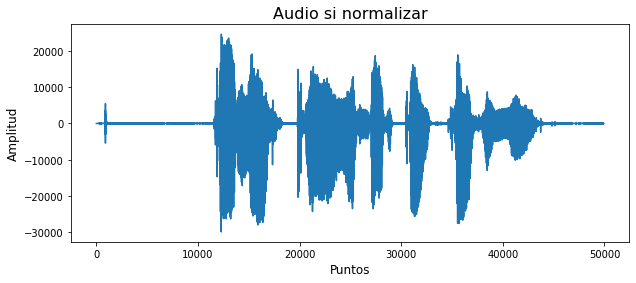

In [5]:
#Gráfica sin normalizar
graficar(t,x,"Puntos","Amplitud","Audio si normalizar")
Audio(x, rate=fs)

In [6]:
def normalizar(fs,x):
    """
    Función para normalizar audio
    inputs:
        fs:Frecuencia de muestreo del audio
        x: Array del Audio original
    outputs:
        x: Array del Audio normalizado
        t: Array temporal normalizado
    """
    x=x-np.mean(x)
    x=x/float(max(abs(x))) # escala la amplitud de la senal 
    t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo normalizado 
    return x,t

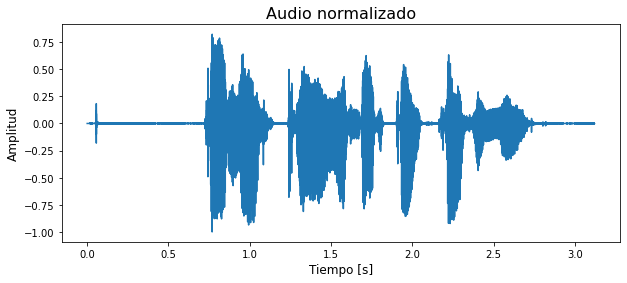

In [7]:
#Gráfica de señal normalizada
x,t=normalizar(fs,x) #Normalizar audio
graficar(t,x,"Tiempo [s]","Amplitud","Audio normalizado")
Audio(x, rate=fs)

Cabe resaltar que normalizar un audio, sirve solo para visualizar de manera más organizada la información que contiene de manera gráfica y numérica, ya que el contenido no cambia en nada.

Luego entonces se procede a realizar el proceso de enventanado, es decir, tomar pequeñas porciones del audio, para obtener información en pequeños segmentos que sean más sencillos de analizar.

## Extracción de características  

En esta etapa de caracterización se busca extraer diferentes medidas con las que puedan representar los datos obtenidos, Basado en distintas medidas como la energía de la señal, los coeficientes espectrales, o razón de cruce por cero, entre otros. 

Existen varias técnicas para selección de características tales como análisis de componenetes principales (PCA, del inglés Principal Component Analysis), análisis discriminante lineal (LDA, del inglés Linear Discriminant Analysis) las cuales se van a implementar en este documento.

### Principal Component Analysis-PCA

In [17]:
bajas=np.loadtxt("low_emotions.txt")#Cargar archivo emociones bajas
altas=np.loadtxt("high_emotions.txt")#Cargar archivo emociones altas

#Creación de etiquetas 
labels_bajas=np.zeros((bajas.shape[0],))
labels_altas=np.ones((altas.shape[0],))

print("Dimensión de bajas emociones: ",np.shape(bajas))
print("Dimensión de altas emociones: ",np.shape(altas))

Dimensión de bajas emociones:  (222, 6373)
Dimensión de altas emociones:  (313, 6373)


In [20]:
data= np.concatenate((bajas,altas))
labels_data= np.concatenate((labels_bajas,labels_altas))
print("Dimensión de mi matriz de datos:",np.shape(data))

#Normalizo datos de mi matriz 
data = StandardScaler().fit_transform(data)

Dimensión de mi matriz de datos: (535, 6373)


In [10]:
pca = PCA(n_components=2)
pca.fit_transform(data)

array([[  6.34958638,  -6.02836946],
       [ -4.5302056 ,  -8.2979571 ],
       [-16.49419656,  -2.9300147 ],
       ...,
       [ 18.24811239, -30.65825718],
       [ 21.11582781, -32.77185716],
       [ 29.87539035, -29.79325897]])

NameError: name 'plot' is not defined